# Load Ground Truth data from the DHM Video

Load and inspect data from the DHM video converted to individual frame data, which can be used by the ```Components/data_loader.FrameDataset```

In [1]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '../../../'))
if project_root not in sys.path:
    sys.path.append(project_root)



import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import torch

from Components import data_loader

### Load Data from root directory
Load all data files in a given root folder

In [2]:
root_dir = "../../Debug Data/Demo Data/DHM GT Data"

dataset = data_loader.FrameDataset(root_dir = root_dir)
dataset_len = len(dataset)


print("Number of Output fields:", dataset_len)

data_sample = dataset[random.randint(0, dataset_len-1)]
print(data_sample)

Number of Output fields: 5
Load Data from:
    ../../Debug Data/Demo Data/DHM GT Data\DHM_002.pt

--Wave field--
   Amplitude: torch.Size([500, 500])
   Opd: torch.Size([500, 500])

opd_units: um
px_size: [3.e-06]

--Estimated Pose--
   Position: tensor([2.5000e-05, 2.5000e-05, 2.5000e-05], dtype=torch.float64)
   Offset: tensor([0., 0., 0.], dtype=torch.float64)
   Axis: tensor([1., 0., 0.], dtype=torch.float64)
   Angle: tensor([1.4845], dtype=torch.float64)



### Load from list of files
Loads data files given their paths as a list

In [3]:
file_list = ["../../Debug Data/Demo Data/DHM GT Data/DHM_000.pt",
            "../../Debug Data/Demo Data/DHM GT Data/DHM_002.pt",
            "../../Debug Data/Demo Data/DHM GT Data/DHM_004.pt"
            ]

dataset = data_loader.FrameDataset(file_list= file_list)
dataset_len = len(dataset)


print("Number of Output fields:", dataset_len)

data_sample = dataset[random.randint(0, dataset_len-1)]
print(data_sample)

Number of Output fields: 3
Load Data from:
    ../../Debug Data/Demo Data/DHM GT Data/DHM_000.pt

--Wave field--
   Amplitude: torch.Size([500, 500])
   Opd: torch.Size([500, 500])

opd_units: um
px_size: [3.e-06]

--Estimated Pose--
   Position: tensor([2.5000e-05, 2.5000e-05, 2.5000e-05], dtype=torch.float64)
   Offset: tensor([0., 0., 0.], dtype=torch.float64)
   Axis: tensor([1., 0., 0.], dtype=torch.float64)
   Angle: tensor([0.], dtype=torch.float64)



### Load data from csv file

In [4]:
csv_file = "../../Debug Data/Demo Data/DHM GT Data/DHM_sample_data.csv"
#create_csv.from_root_dir(root_dir, csv_file)
    
dataset = data_loader.FrameDataset(csv_file = csv_file)
dataset_len = len(dataset)
    
print("Number of Output fields:", dataset_len)

data_sample = dataset[random.randint(0, dataset_len-1)]
print(data_sample)

Number of Output fields: 5
Load Data from:
    c:\Projects\TrackOpt\moving_voxel_BPM_sim\Auxiliary\Debug Data\Demo Data\DHM GT Data\DHM_001.pt

--Wave field--
   Amplitude: torch.Size([500, 500])
   Opd: torch.Size([500, 500])

opd_units: um
px_size: [3.e-06]

--Estimated Pose--
   Position: tensor([2.5000e-05, 2.5000e-05, 2.5000e-05], dtype=torch.float64)
   Offset: tensor([0., 0., 0.], dtype=torch.float64)
   Axis: tensor([1., 0., 0.], dtype=torch.float64)
   Angle: tensor([0.7423], dtype=torch.float64)



### Access Data

In [5]:
file_list = ["../../Debug Data/Demo Data/DHM GT Data/DHM_000.pt"]


dataset = data_loader.FrameDataset(file_list = file_list)

# first file in dataset
data_sample = dataset[0]

print(" data_sample data:")
print("  - Amplitude / Opd")
amp = data_sample.amp
opd = data_sample.opd


print("  - Extra infos")
opd_units = data_sample.opd_units
px_size = data_sample.px_size


print("  - Estimated Position")
position = data_sample.position
offset = data_sample.offset
axis = data_sample.rotation_axis
angle = data_sample.angle


 data_sample data:
  - Amplitude / Opd
  - Extra infos
  - Estimated Position


### Concatenate Datasets
Combine multiple different datasets into one

In [6]:
file_list1 = ["../../Debug Data/Demo Data/DHM GT Data/DHM_000.pt",
            "../../Debug Data/Demo Data/DHM GT Data/DHM_001.pt",
            "../../Debug Data/Demo Data/DHM GT Data/DHM_002.pt"
            ]
dataset1 = data_loader.FrameDataset(file_list = file_list1)

file_list2 = ["../../Debug Data/Demo Data/DHM GT Data/DHM_003.pt",
            "../../Debug Data/D'emo Data/DHM GT Data/DHM_004.pt"
                ]
dataset2 = data_loader.FrameDataset(file_list = file_list2)

dataset = dataset1 + dataset2

dataset_len = len(dataset)

print("Number of Output fields:", dataset_len)

print(dataset)

Number of Output fields: 5
<FrameDataset: 5 files>
 0: ../../Debug Data/Demo Data/DHM GT Data/DHM_000.pt
 1: ../../Debug Data/Demo Data/DHM GT Data/DHM_001.pt
 2: ../../Debug Data/Demo Data/DHM GT Data/DHM_002.pt
 3: ../../Debug Data/Demo Data/DHM GT Data/DHM_003.pt
 4: ../../Debug Data/D'emo Data/DHM GT Data/DHM_004.pt


### Simple Visualization

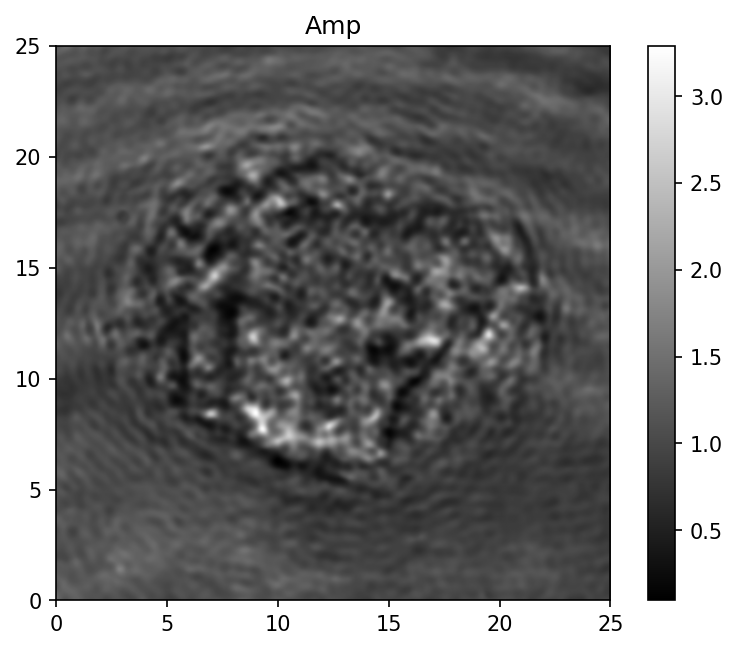

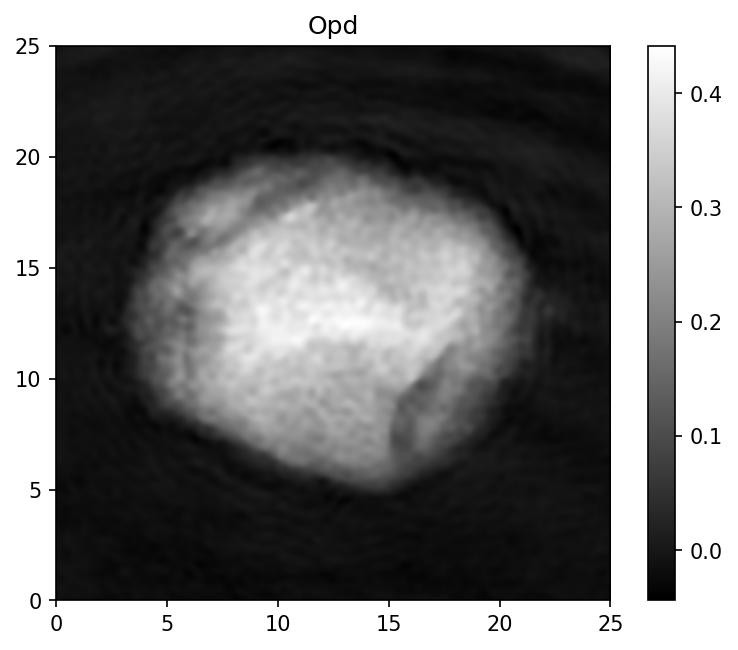

In [11]:
root_dir = "../../Debug Data/Demo Data/DHM GT Data"
    
dataset = data_loader.FrameDataset(root_dir = root_dir)
dataset_len = len(dataset)

data_sample = dataset[random.randint(0, dataset_len-1)]

amp = data_sample.amp.detach().cpu().numpy()
opd = data_sample.opd.detach().cpu().numpy()


def base_plot(image, support, title, units, extent=None, cmap="jet", vmin=None, vmax=None, grid=False):
    """General Plotting for single 2D Images"""
    
    fig, ax = plt.subplots(figsize=(6.4,4.8), dpi=150)
    
    if extent is None:
        extent = [0, support[0] / units, 0, support[1] / units]
    
    im = ax.imshow(image.T, cmap=cmap, 
                   extent=extent, origin="lower",
                   vmin=vmin, vmax=vmax)
    
    # Colorbar
    cbar = fig.colorbar(im)
    cbar.formatter = ticker.FuncFormatter(lambda x, _: f"{x:.7}")
    cbar.update_ticks()

   
    # Plot Title
    ax.set_title(title)
    
    # Grid Lines
    if grid:
        plt.xticks(range(0, int(support[0]/units) + 1, 5))
        plt.yticks(range(0, int(support[1]/units) + 1, 5))
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    return fig, ax 

spatial_resolution = [1e-7,1e-7,1e-7]
grid_shape = [250,250,250]

spatial_support = [spatial_resolution[i]*grid_shape[i] for i in range(3)]
fig, ax = base_plot(amp, spatial_support, "Amp", units=1e-6, cmap="gray", vmin=None, vmax=None)
fig, ax = base_plot(opd, spatial_support, "Opd", units=1e-6, cmap="gray")